# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [16]:
import pandas as pd

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn



In [17]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

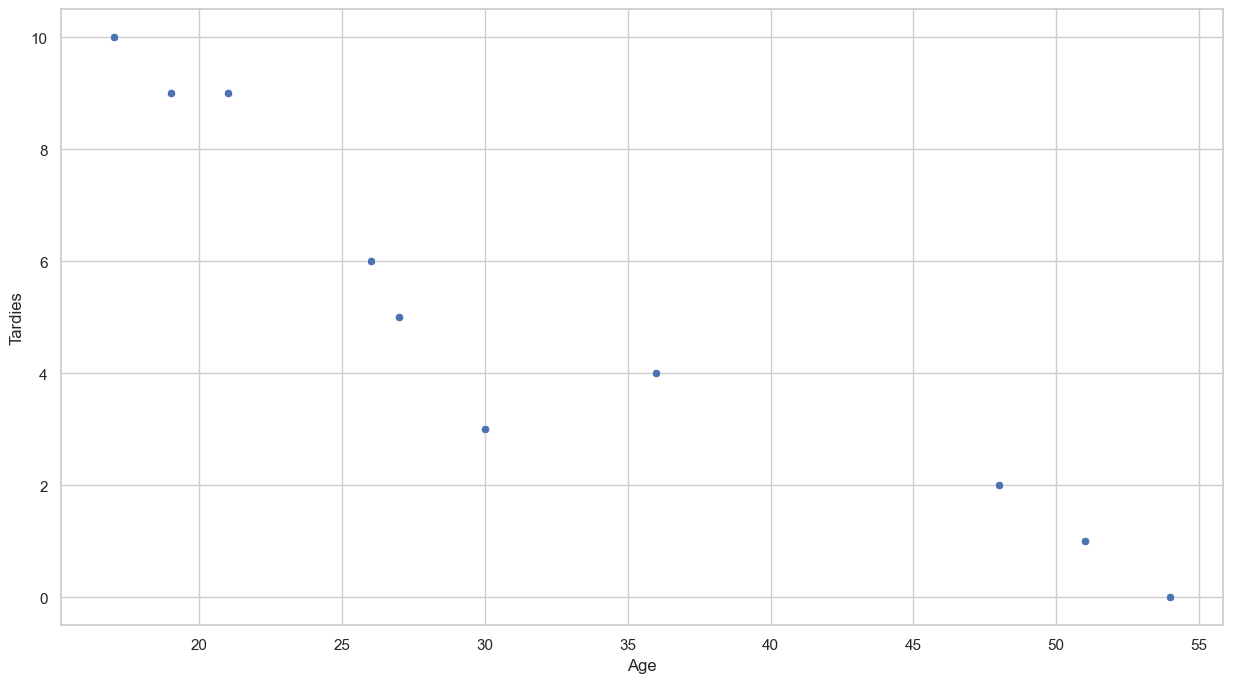

In [18]:
sns.scatterplot(x=student_data.Age, y =student_data.Tardies);


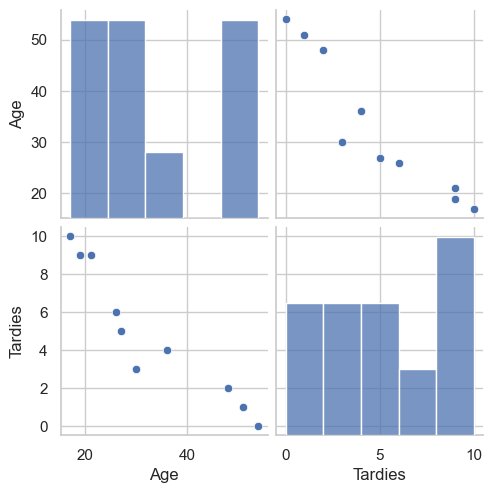

In [19]:
sns.pairplot(student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [21]:
''' 
YES, As younger more often they arrive in class.
''';

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [13]:
v_correlation  = student_data.corr()
v_correlation

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [15]:
v_covariance = student_data.cov()
v_covariance

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [28]:

X = student_data[["Age"]]
y = student_data.Tardies
lr = LinearRegression()
lr.fit(X, y) 



LinearRegression()

In [29]:
lr.coef_

array([-0.24282077])

In [30]:
lr.intercept_

12.888803363135771

Plot your regression model on your scatter plot.

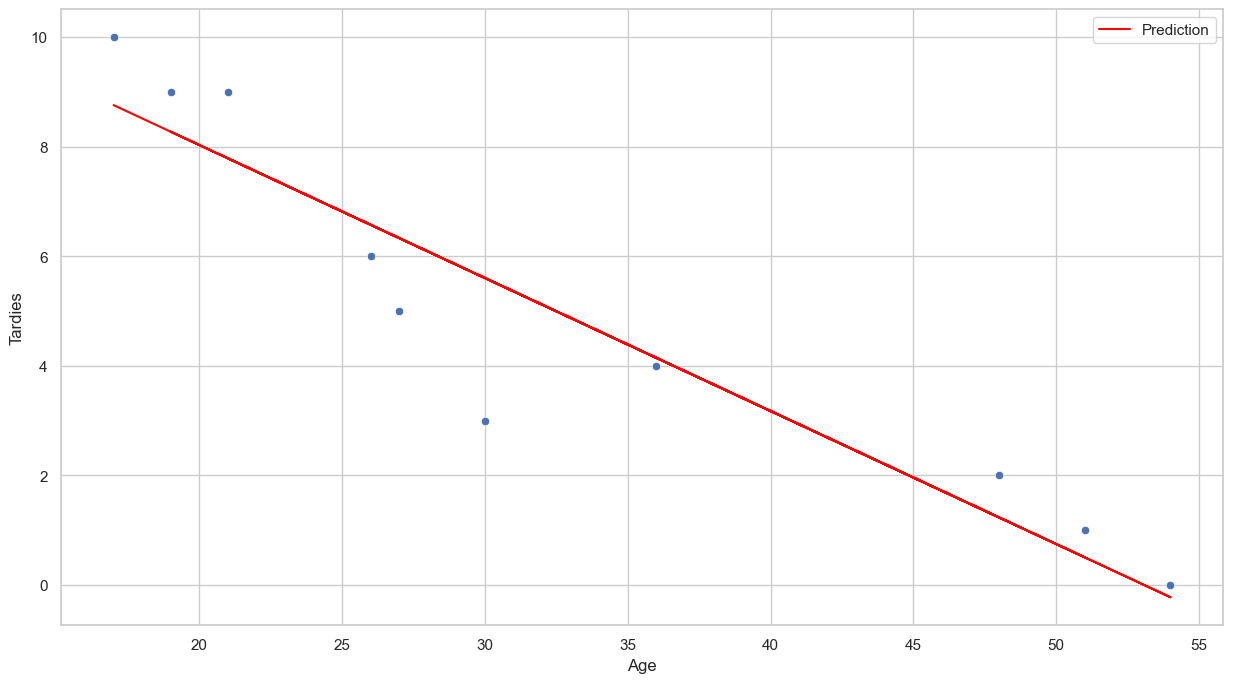

In [36]:


student_data["prediction_scikit"] = student_data.Age * lr.coef_[0] + lr.intercept_
sns.scatterplot(x=student_data.Age, y =student_data.Tardies);
plt.plot(student_data.Age,student_data["prediction_scikit"],c="red", label="Prediction")
plt.legend();


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [35]:
'''
Model seems to work well as variance of data points is short related to prediction line.
'''

''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [82]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm



from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [40]:
df_vehicles = pd.read_csv("../lab-regression-analysis/vehicles.csv")
df_vehicles.sample(2)
df_vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [65]:
l_fields_corr = ["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]

def get_corr_co2(input, output):
    return df_vehicles[input].corr(df_vehicles[output])

for i in l_fields_corr:
    v_corr = get_corr_co2(i,'CO2 Emission Grams/Mile')
    print(i, v_corr)





Year -0.22229960295054216
Cylinders 0.752392553729749
Fuel Barrels/Year 0.9861886621428733
Combined MPG -0.9262290389336436
Fuel Cost/Year 0.9308651512201842


In [89]:
# The most significant variable could be 'Fuel Barrels/Year'.It has a direct relattion  to the amount of fuel used.
# The least helpful could be 'Year', as it indirectly affects emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [88]:
X = df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]
y = df_vehicles['CO2 Emission Grams/Mile']
X = sm.add_constant(X) 
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             16:47:03   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [91]:
# Fuel Barrels/Year has highest coefficient so it means that has biggest impact in CO2 emissions.
# All P-value are 0 so all values are significant.
# Combined MPG is negative so it's a inverse relationship: more negative, less impact in Co2
# R2 is very high so it means that model is explained.
# Standard Errors are very low (than coef) so it means an accurate model
# Year could seems a variable with high impact but its value show that's least variable.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [125]:
datos = {
    "X":[1,3,4,6,8,9,11,14],
    "Y":[1,2,4,4,5,7,8,13]
}
df = pd.DataFrame(datos)
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

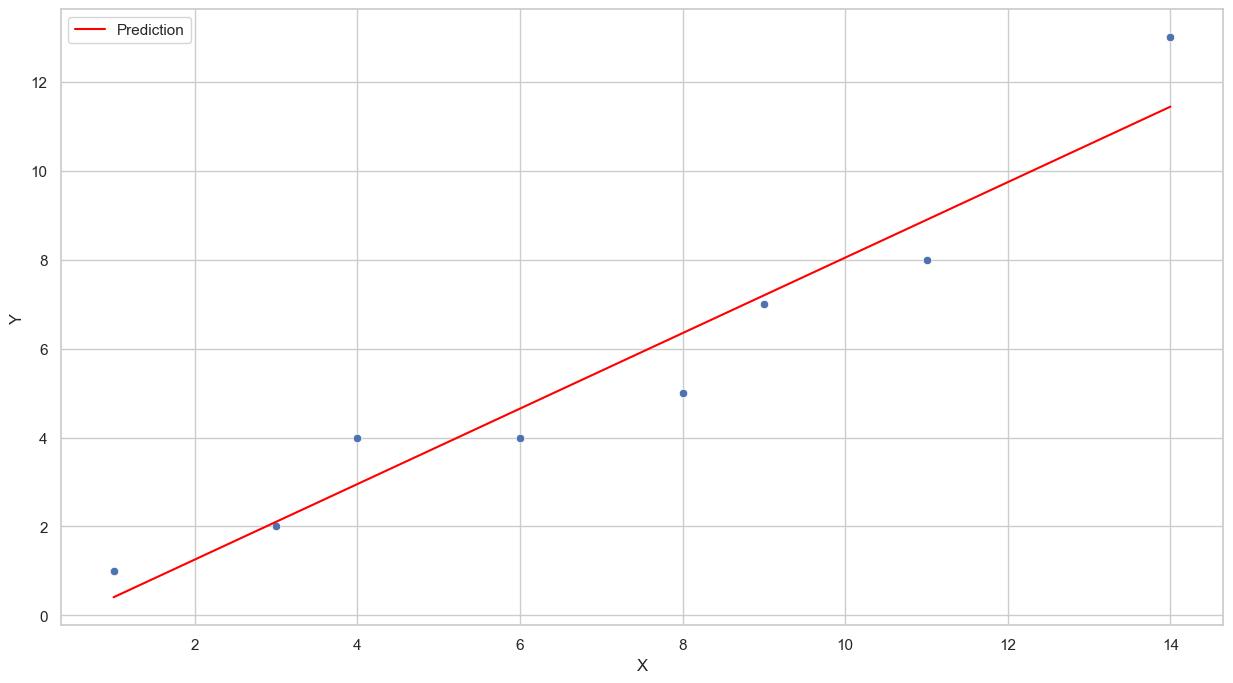

In [126]:
X = df[["X"]]
y = df.Y
lr = LinearRegression()
lr.fit(X, y) 

df["prediction_scikit"] = df.X * lr.coef_[0] + lr.intercept_
sns.scatterplot(x=df.X, y =df.Y);
plt.plot(df.X,df["prediction_scikit"],c="red", label="Prediction")
plt.legend();
plt.show()

In [127]:
result = smf.ols("X ~ Y", data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000102
Time:                        17:45:54   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.2

/Users/pere/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [128]:
l_corr = df.corr()
l_corr

,X,Y,prediction_scikit
X,1.00000,0.96523,1.00000
Y,0.96523,1.00000,0.96523
prediction_scikit,1.00000,0.96523,1.00000


In [129]:
# Slope is a positive trend so more invitations more people attend.
# As data points are close, there is a big correlation between invitations and attendants.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

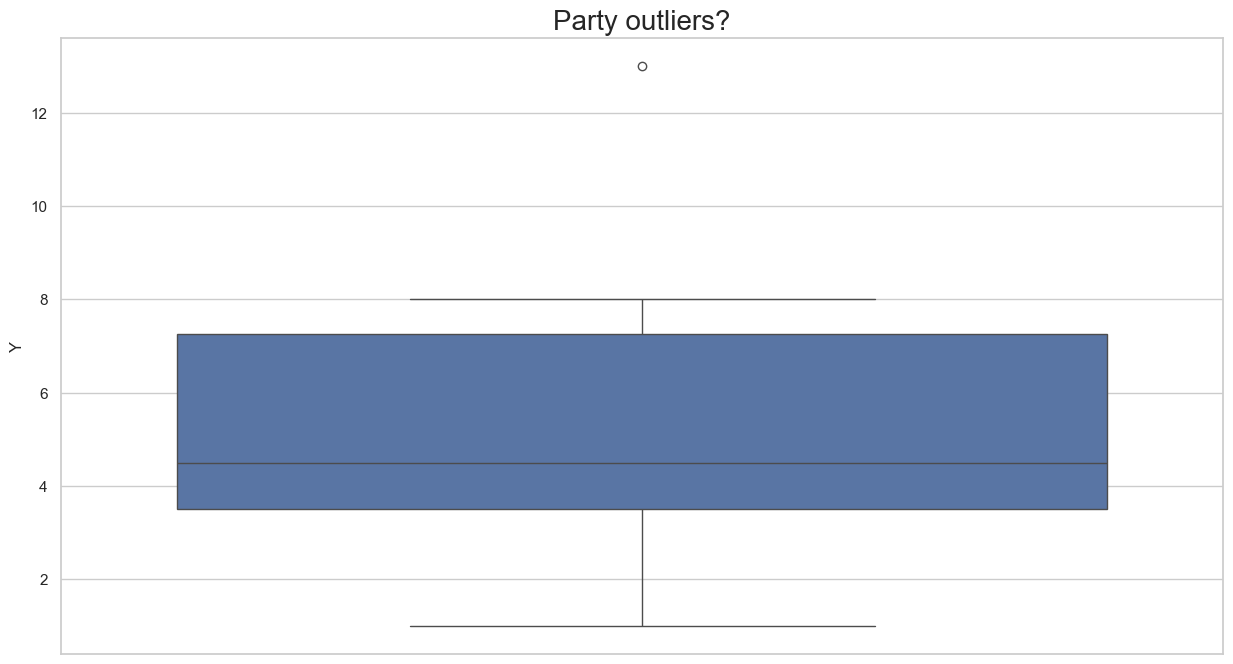

In [130]:
sns.boxplot(df.Y)
plt.title("Party outliers?", size= 20);
plt.show()

In [131]:
datos = {
    "X":[1,3,4,6,8,9,11],
    "Y":[1,2,4,4,5,7,8]
}
df = pd.DataFrame(datos)
df


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

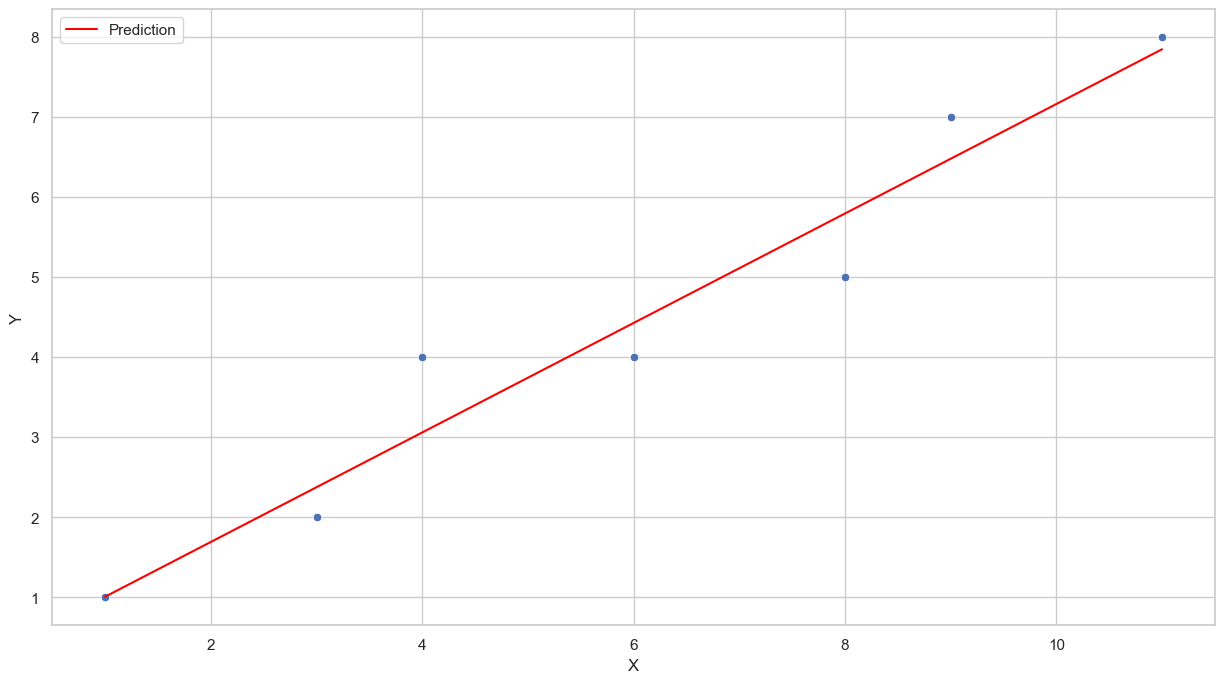

In [132]:
X = df[["X"]]
y = df.Y
lr = LinearRegression()
lr.fit(X, y) 

df["prediction_scikit"] = df.X * lr.coef_[0] + lr.intercept_
sns.scatterplot(x=df.X, y =df.Y);
plt.plot(df.X,df["prediction_scikit"],c="red", label="Prediction")
plt.legend();
plt.show()

In [133]:
l_corr = df.corr()
l_corr

,X,Y,prediction_scikit
X,1.000000,0.971278,1.000000
Y,0.971278,1.000000,0.971278
prediction_scikit,1.000000,0.971278,1.000000


In [136]:
result = smf.ols("X ~ Y", data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000264
Time:                        17:46:50   Log-Likelihood:                -8.2295
No. Observations:                   7   AIC:                             20.46
Df Residuals:                       5   BIC:                             20.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1061      0.755     -0.140      0.8

/Users/pere/miniconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [135]:

# With outliers out of data, correlation is identical and slope is similar.
# If we check P-value we can say that null hypotesis is rejected. There is a strong correlation between invitations and attendants